In [1]:
# Import du jeu de donnée
import pandas as pd
import numpy as np
df = pd.read_csv('fr.openfoodfacts.org.products.csv',sep = '\t',low_memory=False)
# On affiche les colonnes
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


<Axes: >

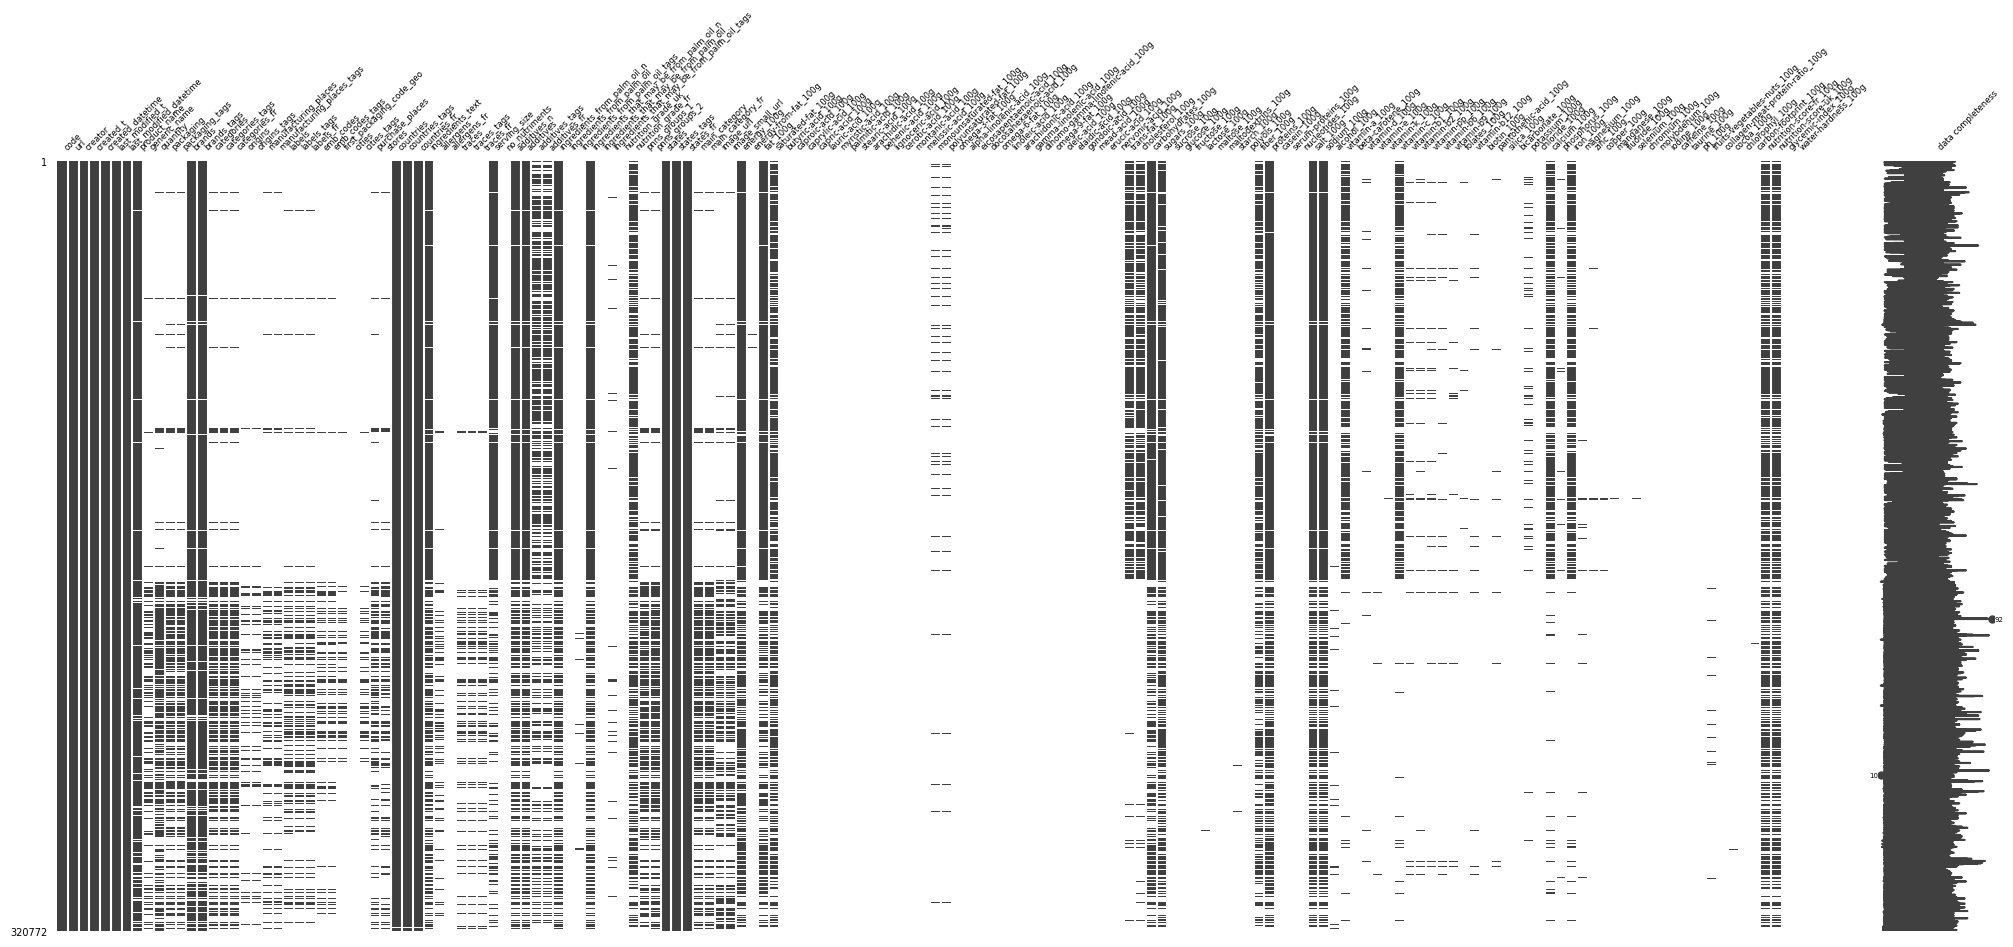

In [2]:
# missingno matrice avec label
import missingno as msno
msno.matrix(df, labels=True, fontsize=6)

<Axes: >

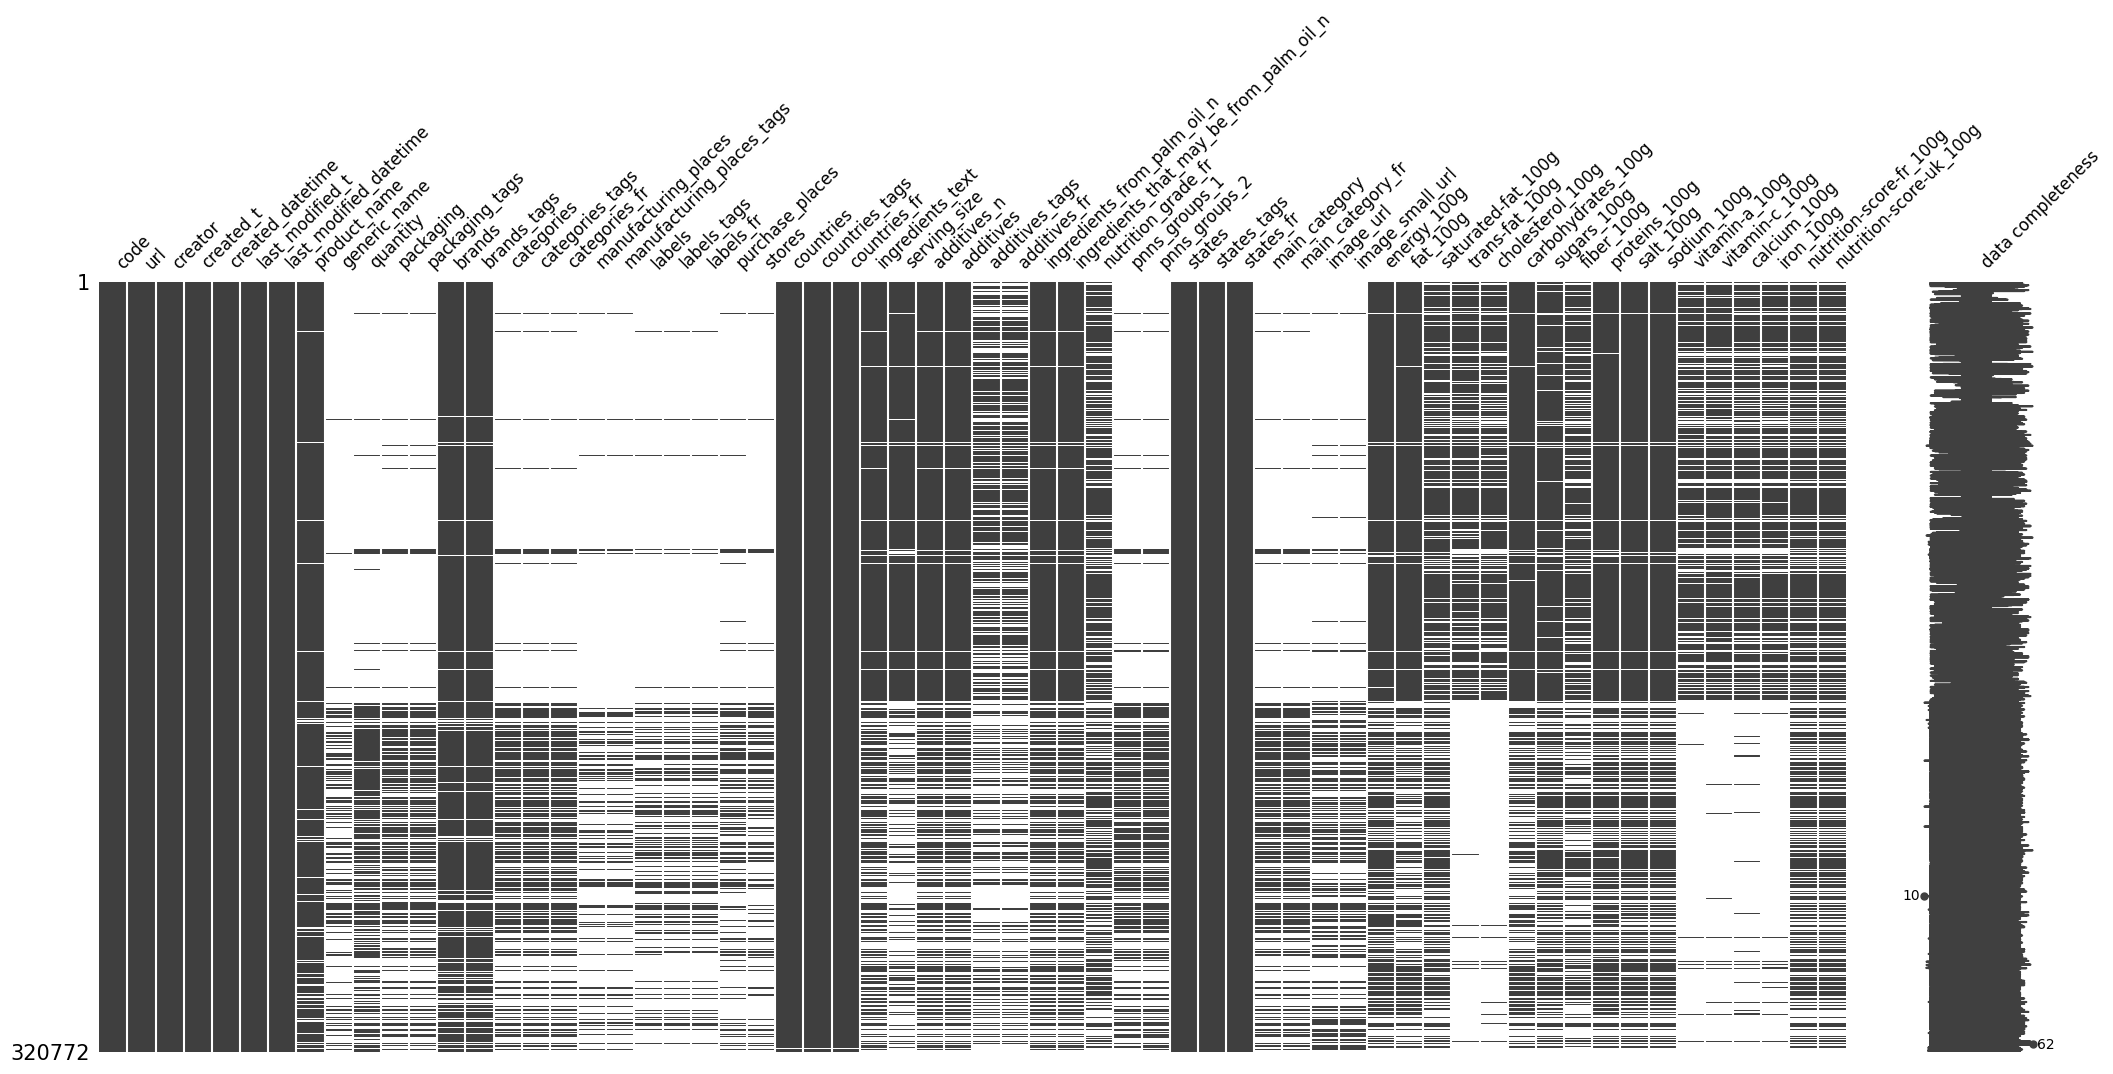

In [3]:
# On enlève les colonnes avec moins de 10% de valeurs présentes
df2_under_10 = df.dropna(thresh=0.1*df.shape[0], axis=1)

# On affiche les colonnes
msno.matrix(df2_under_10, labels=True, fontsize=12)

In [4]:
# Les pnns_groups_1 regroupe les différentes catégories de produits, cependant tout n'est pas orthographié de la même manière
df3_pnns = df2_under_10.copy()

# Nettoyage des valeurs de pnns_groups_1, enlever les - et mettre en majuscule, remplacer Unknown par NaN
df3_pnns['pnns_groups_1'] = df3_pnns['pnns_groups_1'].str.replace('-',' ').str.capitalize().replace('Unknown',np.nan)

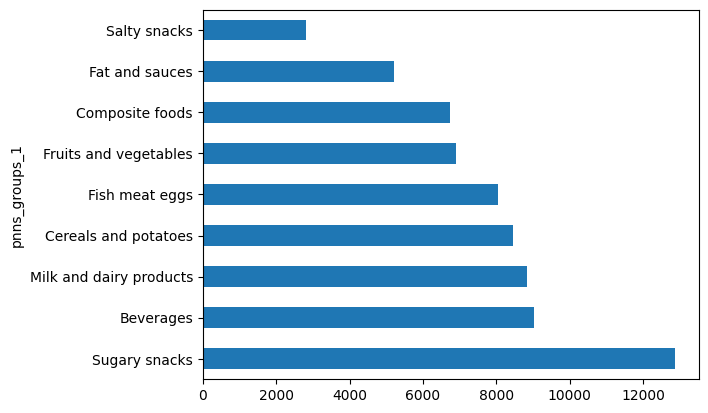

In [5]:
# Graphique
import matplotlib.pyplot as plt
df3_pnns['pnns_groups_1'].value_counts().plot(kind='barh')
plt.show()


Nous allons réaliser des box plots en fonction des data que nous avons et par catégorie pour voir si l'on peut prédire le jeu de donnée. A en juger par la matrice de missing no. Une bonne moitié d'entre eux sont présent malgré la présence des _100g. Peut être qu'une méthode de regression logistique pourrait fonctionner. On va réaliser quelques analyses complémentaires pour voir à l'oeil s'il y a quelques variations visuellement intéressantes.

<Axes: >

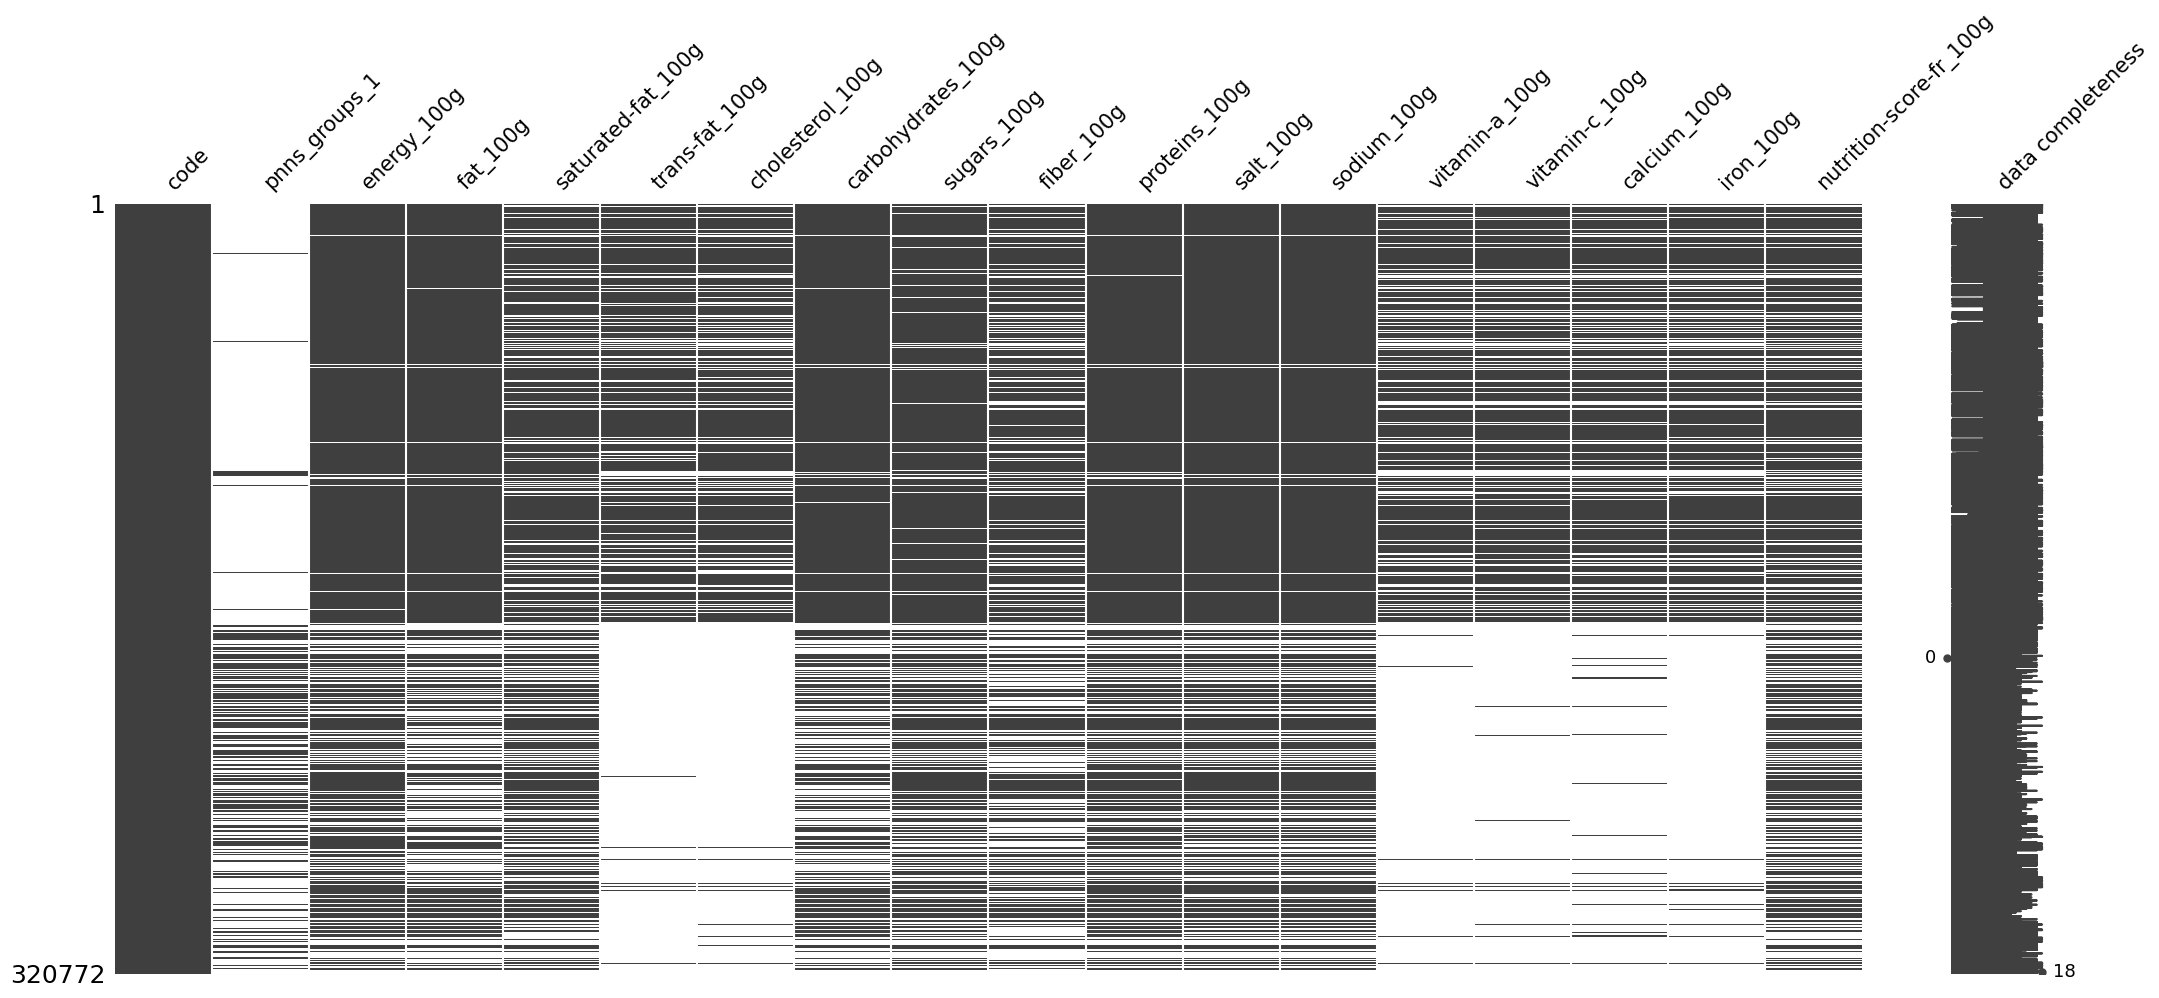

In [6]:
# Se débarasser des valeurs que l'on utilisera pas pour notre analyse (J'ai déjà réalisé le boxplot avec df3_pnns avant, et certaines données ne servait à rien, j'ai donc décidé d'itérer les graphiques qui viendront après avec df4 et df5)
df4_drop = df3_pnns.drop(columns=['url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_fr',
       'manufacturing_places', 'manufacturing_places_tags', 'labels',
       'labels_tags', 'labels_fr', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_fr', 'ingredients_text', 'serving_size',
       'additives_n', 'additives', 'additives_tags', 'additives_fr',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'image_url', 'image_small_url', 'nutrition-score-uk_100g'])
msno.matrix(df4_drop, labels=True, fontsize=15)

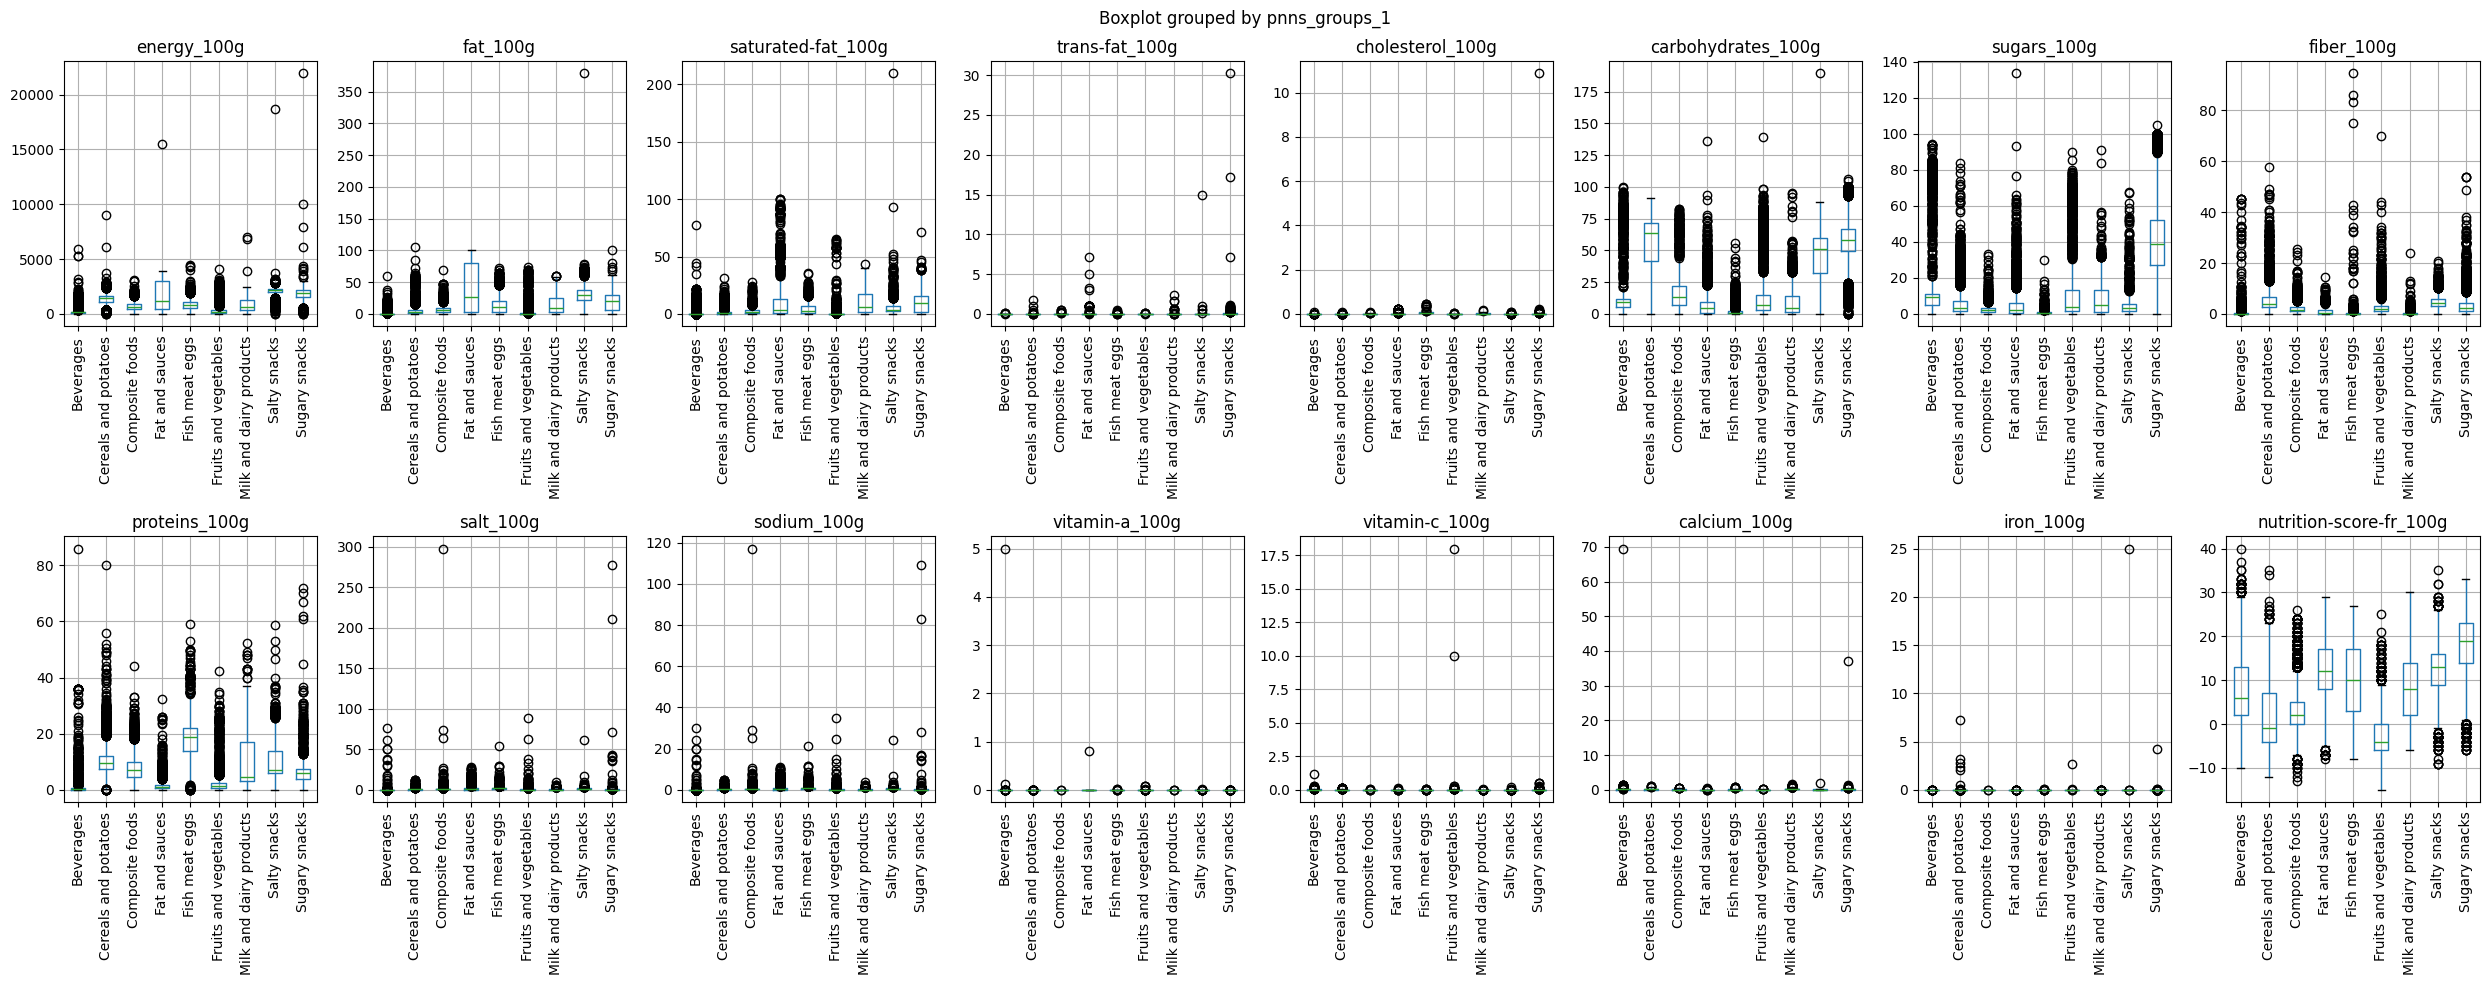

In [7]:
# Box plot pour chaque variable numérique et en fonction des catégories
import matplotlib.pyplot as plt

# Créations de variables pour afficher les boxplots en tableau et réduire l'espace occupé par les graphiques
num_cols = 8
num_rows = int(np.ceil(len(df4_drop.select_dtypes(include=['float64']).columns) / num_cols))


# Créer la figure et les axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5*num_rows))

# Aplatir les axes pour faciliter l'indexation
axes = axes.flatten()

# Boucle pour créer les boxplots
for i, col in enumerate(df4_drop.select_dtypes(include=['float64']).columns):
    df4_drop.boxplot(column=col, by='pnns_groups_1', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelrotation=90)

# Supprimer les axes inutilisés
for j in range(i+1, num_cols*num_rows):
    fig.delaxes(axes[j])

# Afficher la figure
plt.tight_layout()
plt.show()

In [8]:
import numpy as np

df5_IQR = df4_drop.copy()

for category in df5_IQR['pnns_groups_1'].unique():
    category_data = df5_IQR[df5_IQR['pnns_groups_1'] == category]
    for col in df5_IQR.select_dtypes(include=['float64']).columns:
        Q1 = category_data[col].quantile(0.25)
        Q3 = category_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remplacement des valeurs aberrantes par NaN pour la catégorie et la colonne courantes
        df5_IQR.loc[(df5_IQR['pnns_groups_1'] == category) & 
                    ((df5_IQR[col] < lower_bound) | (df5_IQR[col] > upper_bound)), col] = np.nan

# On affiche le nombre de valeurs remplacées par NaN
print(f"Nombre de valeurs remplacées par NaN : {df5_IQR.isna().sum().sum()}")


Nombre de valeurs remplacées par NaN : 2147589


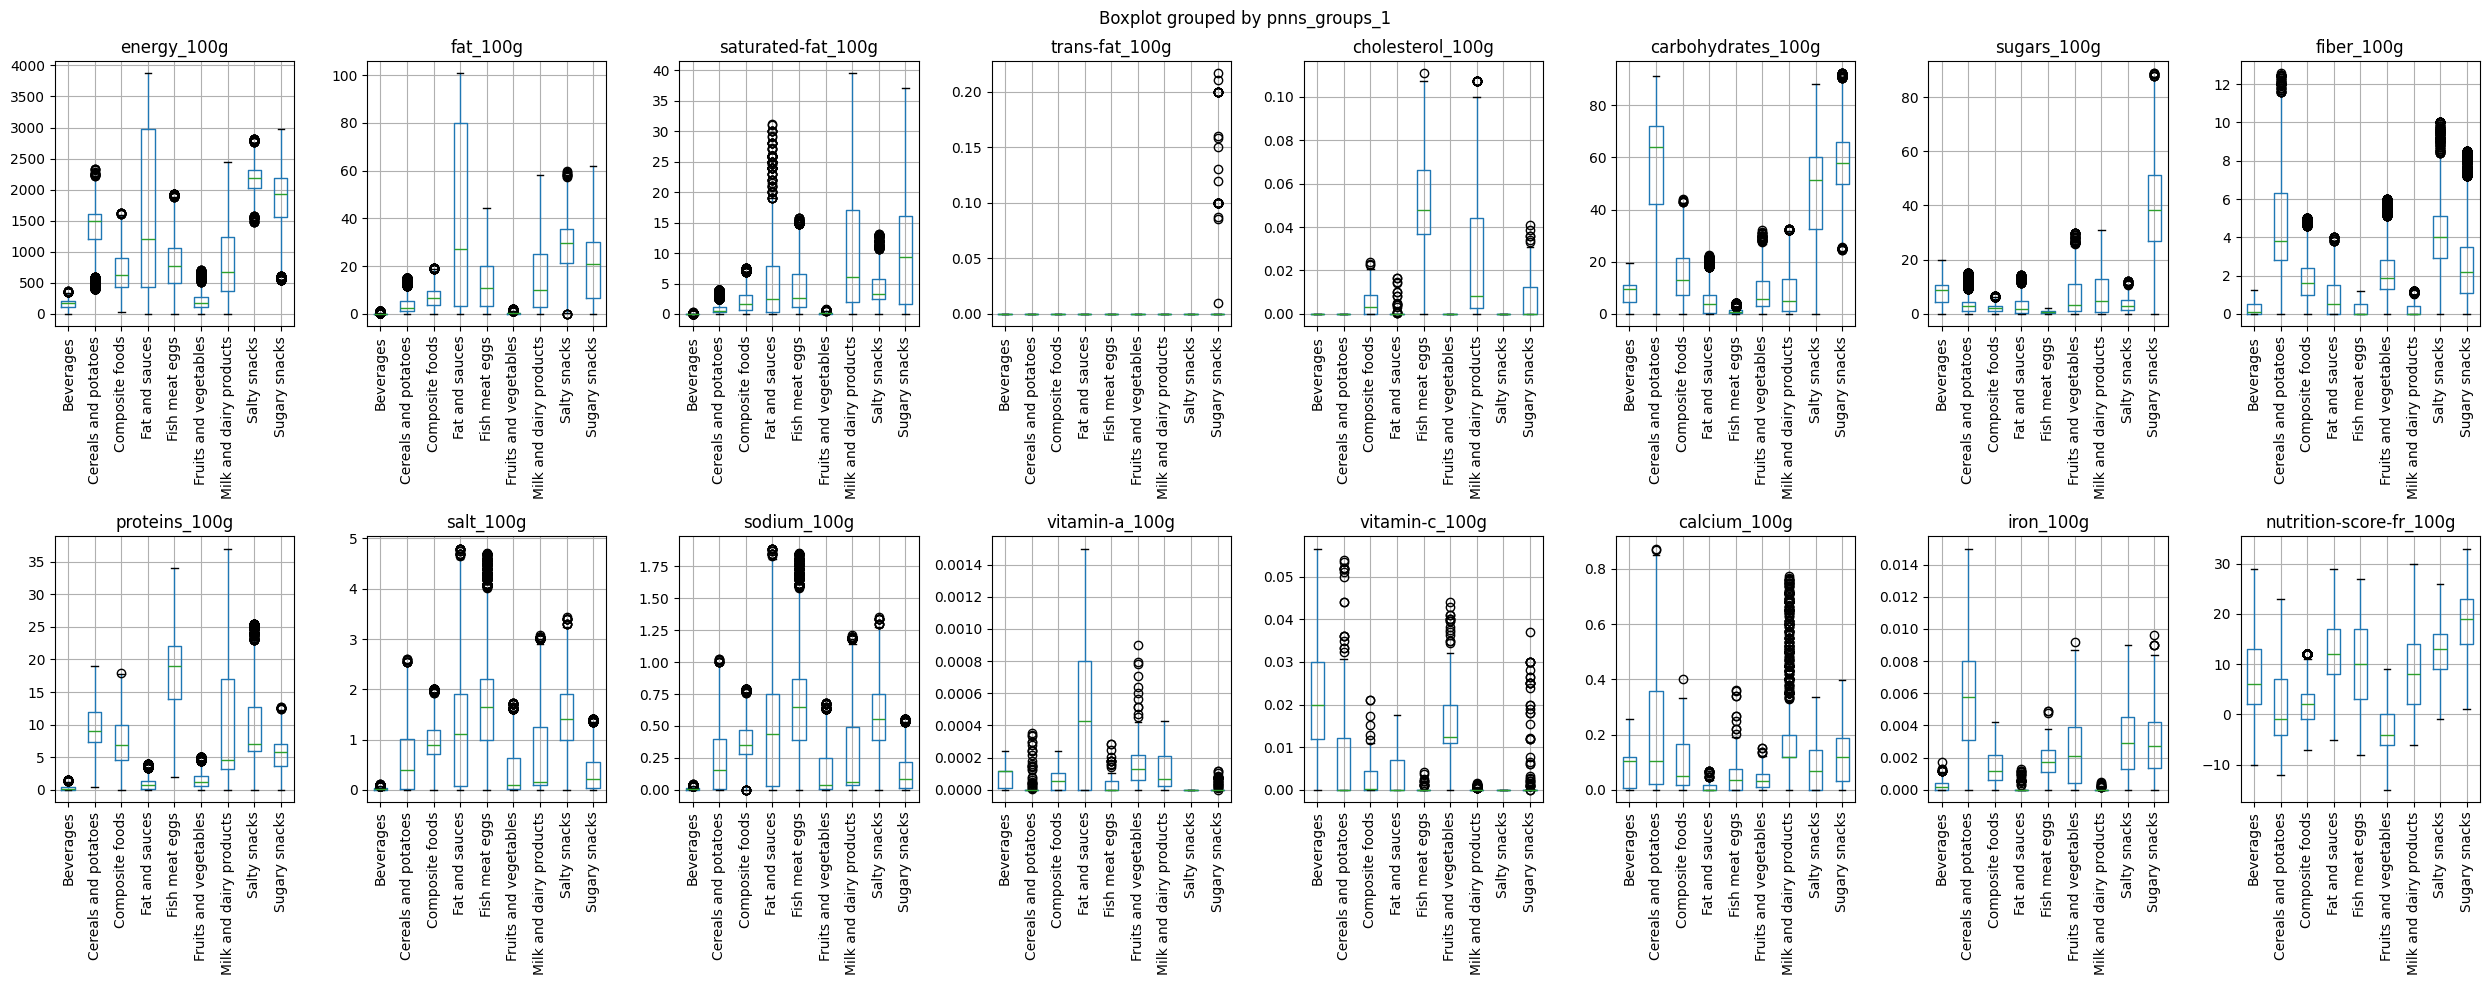

In [12]:
# On refait les boxplots avec df5_IQR
num_cols = 8
num_rows = int(np.ceil(len(df5_IQR.select_dtypes(include=['float64']).columns) / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(df5_IQR.select_dtypes(include=['float64']).columns):
    df5_IQR.boxplot(column=col, by='pnns_groups_1', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelrotation=90)

for j in range(i+1, num_cols*num_rows):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()    

Après notre nettoyage, on peut voir qu'une très grande proportion des outliers ont correctement été remplacé par des NaN. C'est une bonne nouvelle car ça va améliorer la pertinence de l'analyse suivante. Qui nous permettra de créer je l'espère des pnns groups.

Nombre de valeurs manquantes : 1536054


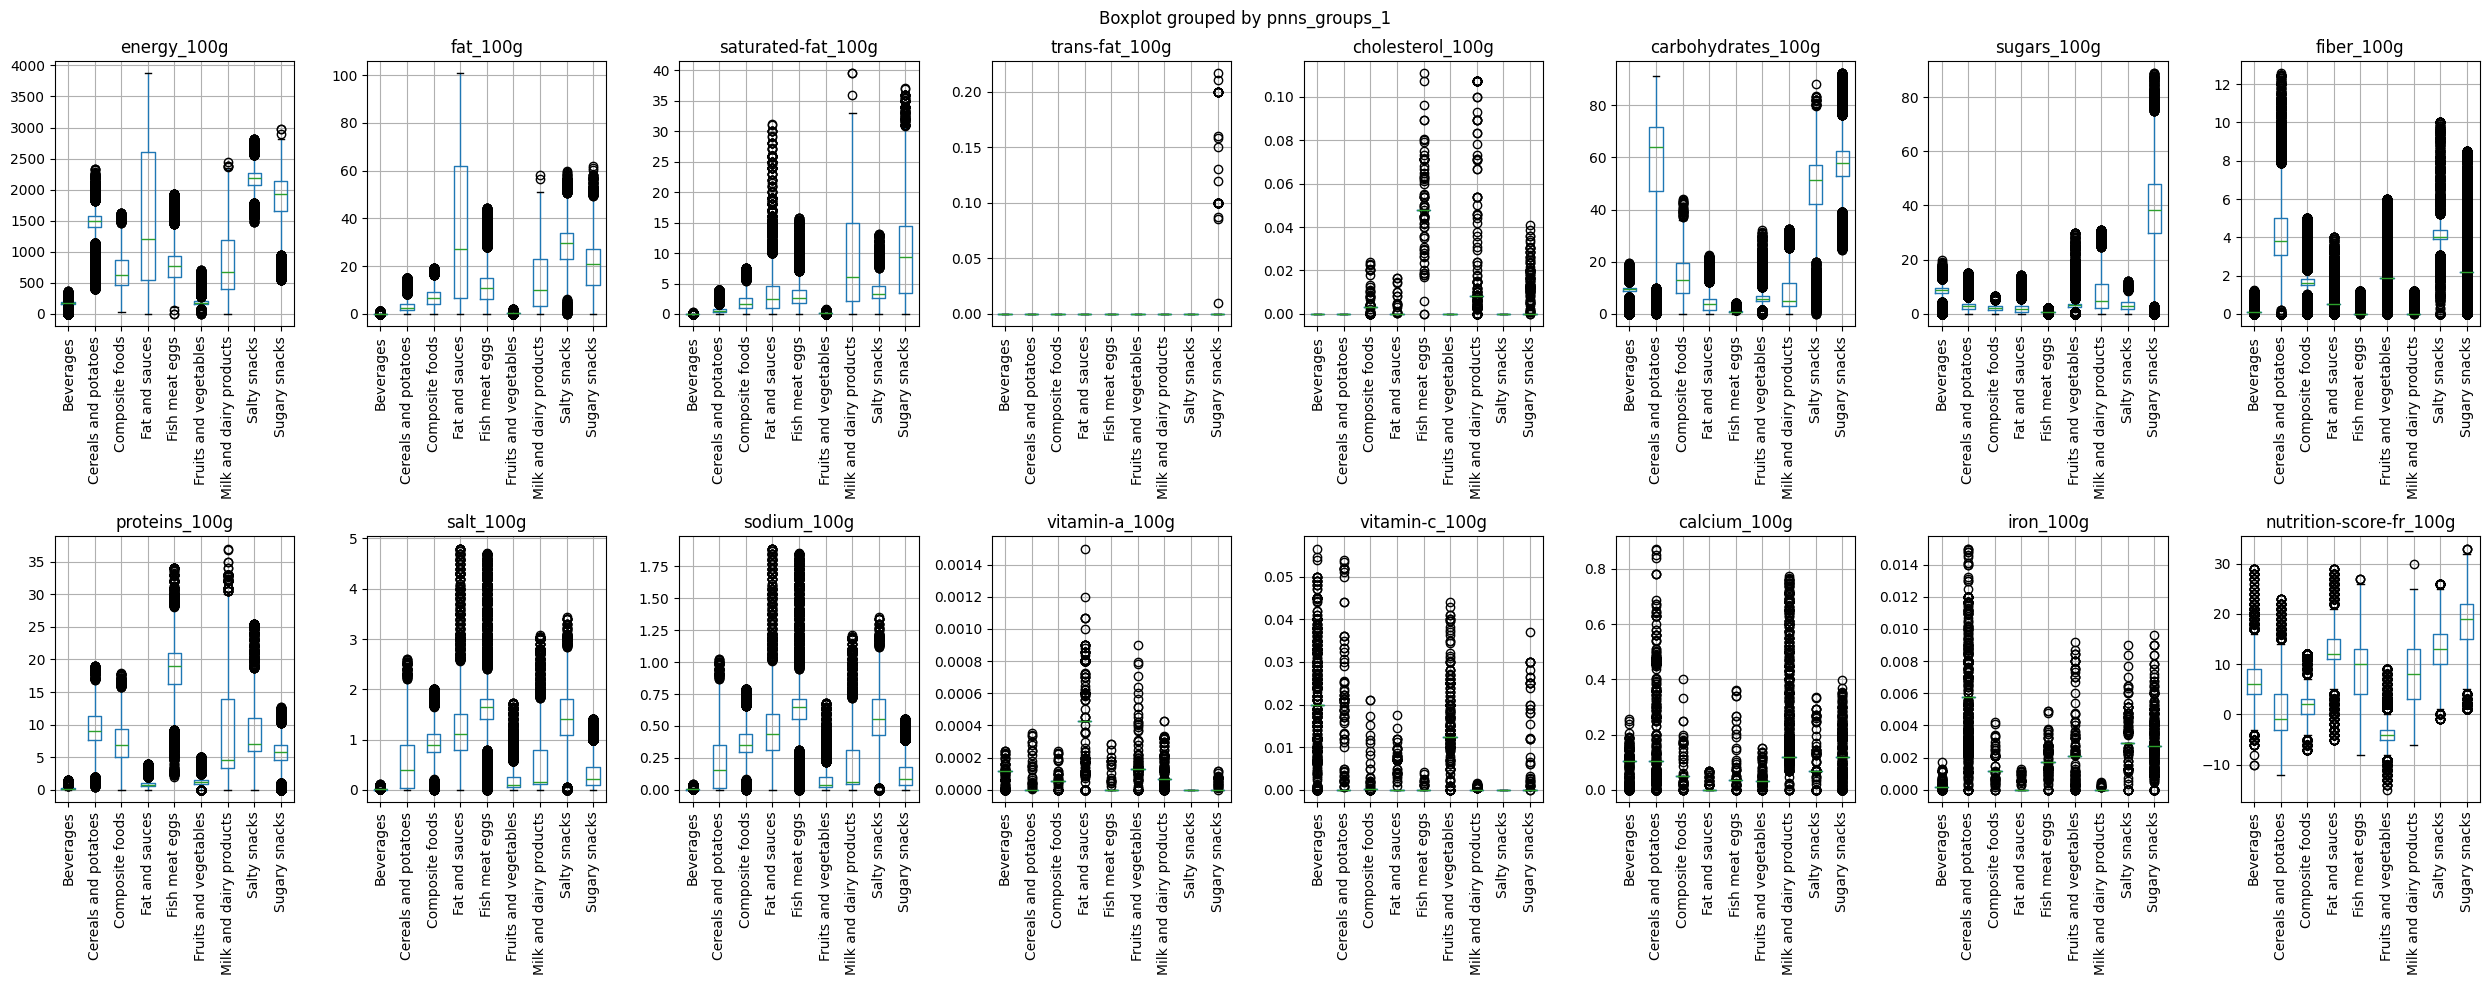

In [16]:
# On remplace les valeurs manquantes par la moyenne pour chaque catégorie de pnn_groups_1
df6_mean = df5_IQR.copy()

for category in df6_mean['pnns_groups_1'].unique():
    category_data = df6_mean[df6_mean['pnns_groups_1'] == category]
    for col in df6_mean.select_dtypes(include=['float64']).columns:
        median = category_data[col].median()
        df6_mean.loc[(df6_mean['pnns_groups_1'] == category) & (df6_mean[col].isna()), col] = median

# On affiche
print(f"Nombre de valeurs manquantes : {df6_mean.isna().sum().sum()}")
df6_mean.describe()

# On refait les boxplots avec df6_mean
num_cols = 8
num_rows = int(np.ceil(len(df6_mean.select_dtypes(include=['float64']).columns) / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(df6_mean.select_dtypes(include=['float64']).columns):
    df6_mean.boxplot(column=col, by='pnns_groups_1', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelrotation=90)
    
for j in range(i+1, num_cols*num_rows):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()


Nombre de valeurs manquantes : 1536054


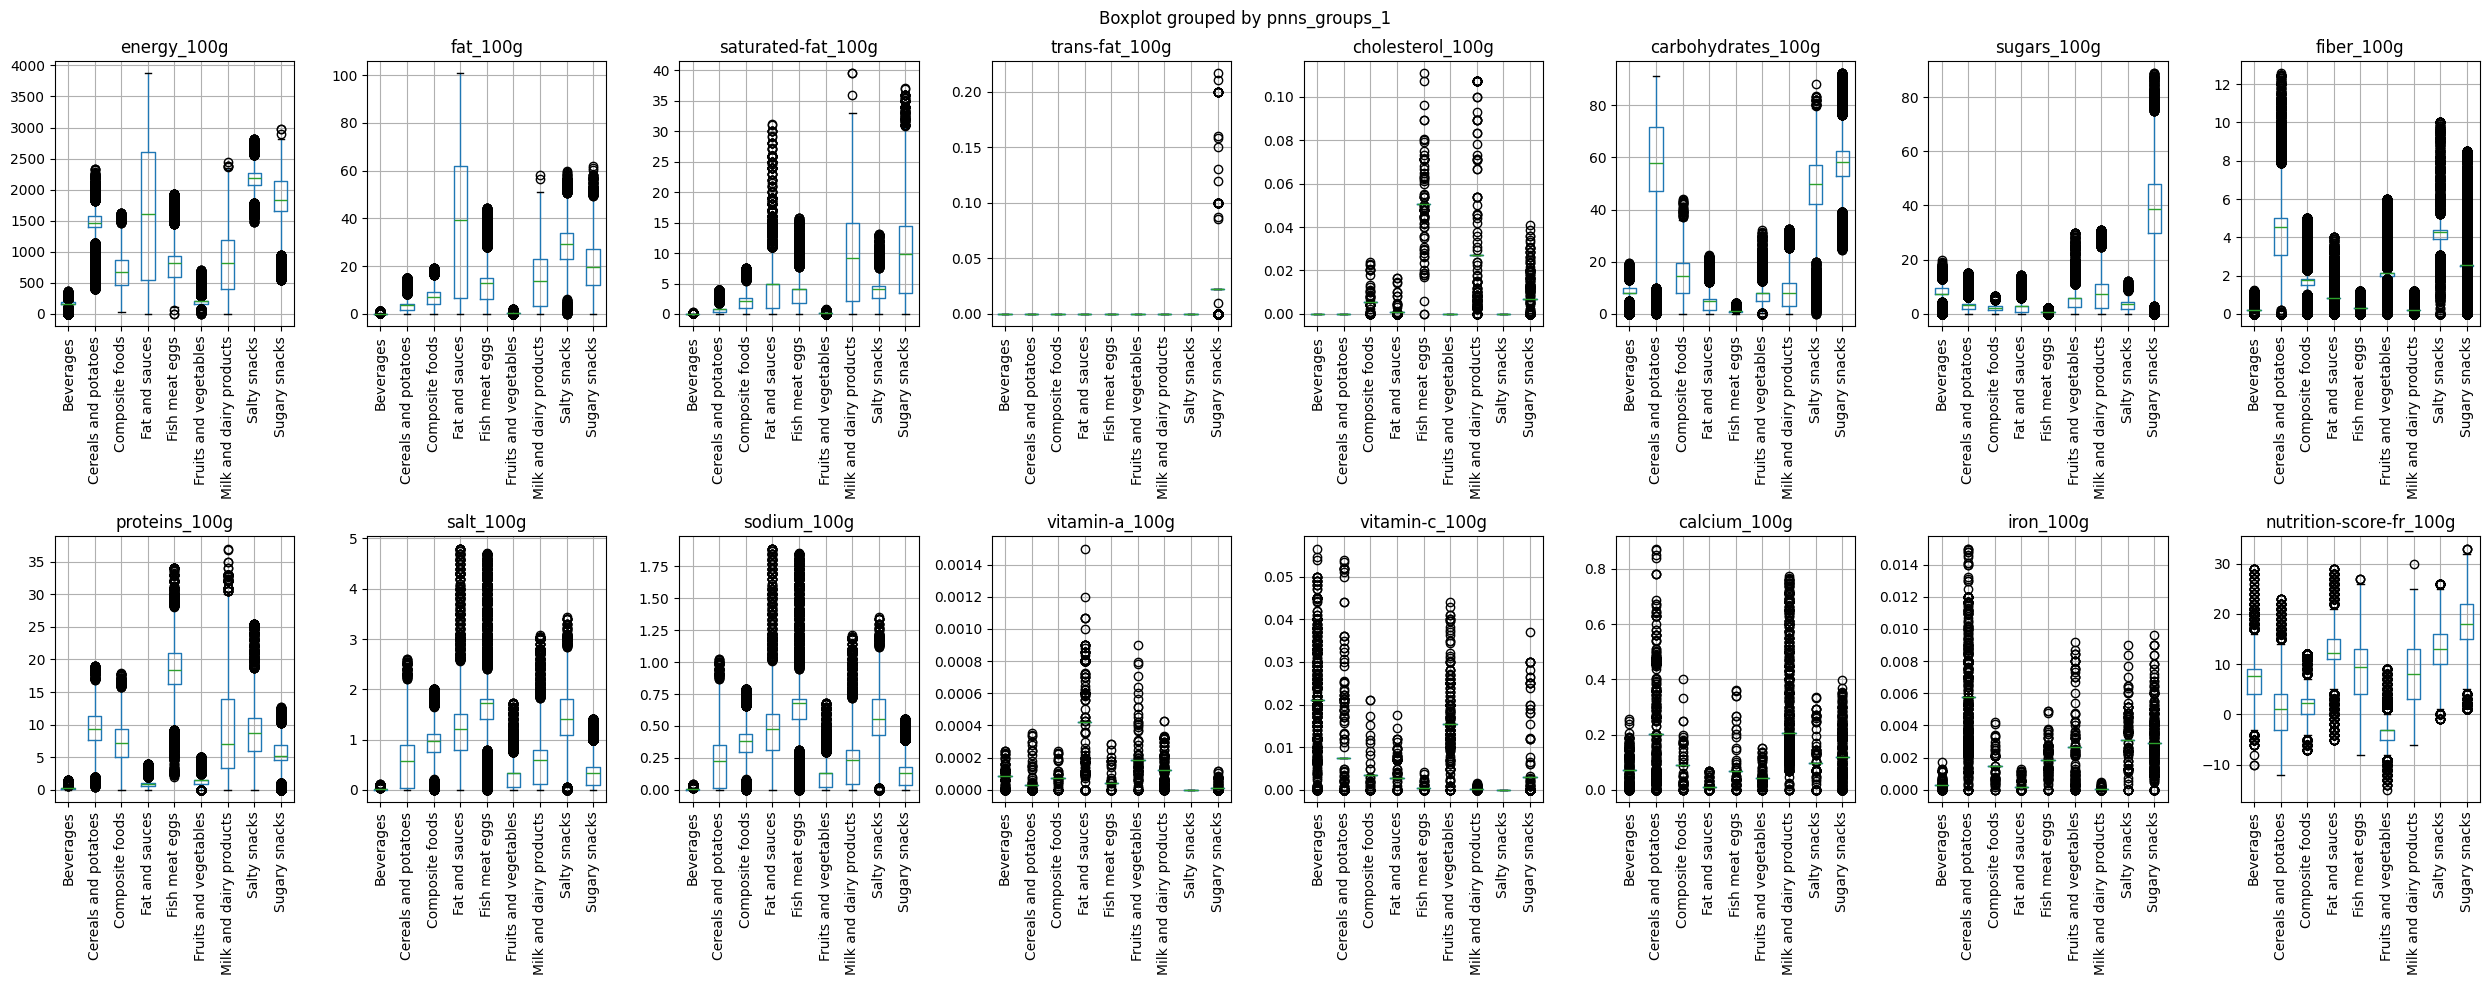

In [17]:
# On remplace les valeurs manquantes par la moyenne pour chaque catégorie de pnn_groups_1
df6_mean = df5_IQR.copy()

for category in df6_mean['pnns_groups_1'].unique():
    category_data = df6_mean[df6_mean['pnns_groups_1'] == category]
    for col in df6_mean.select_dtypes(include=['float64']).columns:
        mean = category_data[col].mean()
        df6_mean.loc[(df6_mean['pnns_groups_1'] == category) & (df6_mean[col].isna()), col] = mean

# On affiche
print(f"Nombre de valeurs manquantes : {df6_mean.isna().sum().sum()}")
df6_mean.describe()

# On refait les boxplots avec df6_mean
num_cols = 8
num_rows = int(np.ceil(len(df6_mean.select_dtypes(include=['float64']).columns) / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(df6_mean.select_dtypes(include=['float64']).columns):
    df6_mean.boxplot(column=col, by='pnns_groups_1', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelrotation=90)
    
for j in range(i+1, num_cols*num_rows):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()
